![Title](diabetes.png)


In [1]:
# Import all the necessary libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Importing the Data set File


In [2]:
# to impot the file
df=pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Variable description:

1)Gender:
Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.

2)Age:
Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.

3)Hypertension:
Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated.

4)Heart Disease:
Heart disease is another medical condition that is associated with an increased risk of developing diabetes.

5)Smoking History:
Smoking history is also considered as a risk factor on Diabetes. It represents smoking history of the patient.

6)BMI(Body Mass Index):
BMI (Body Mass Index) is a measure of body fat based on weight and height. Patients with higher BMI are known for having more risk of suffering from diabetes.

7)HbA1c Level:
HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months.

8)Blood Glucose Level:
Blood glucose level refers to the amount of glucose in the bloodstream at a given time.

9)Diabetes:
Represents the patient if he/she has diabetes or not. 0 is negative, 1 is positive.

# Here my target variable is diabetes, and value of diabetes is depend on other variables.

In [3]:
## Get information about column data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
## Display the first few rows of the DataFrame
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
## Display the Last few rows of the DataFrame
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


# Data Cleaning

In [6]:
# Count the number of missing values in each column
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
# Count the number of duplicated rows
df.duplicated().sum()

3854

In [8]:
#here we are dropping the duplicate values and creating new data  frame
df_New=df.drop_duplicates()
df_New

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [9]:
df_New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [10]:
unique_values = df.nunique()
unique_values

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [11]:
unique_values1 = df_New.nunique()
unique_values1

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [12]:
# this will help us to know in which columns values are missing(if any)

df_New.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [13]:
#to know unique values for each columns
df_New.diabetes.value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

In [14]:
#Checking  how many types of values presnet in the gender variable 
df.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [15]:
# remove 'other in gender' as it's quantity is very small as compared to Female and Male

df_New.drop(df[df['gender']=='Other'].index , inplace=True)

In [16]:
# Checking it 'OTHER in gender' has deleted or not.

df_New.gender.value_counts()

Female    56161
Male      39967
Name: gender, dtype: int64

In [17]:
# Checking Smoking column value counts.

df_New.smoking_history.value_counts()


never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

In [18]:
#here we are coverting smoking_history variables in 3 format non-smoker,current,past-smoker
def smoke(smoking_status):
  if smoking_status in ['never','No Info']:
      return 'non-smoker'
  elif smoking_status == 'current':
      return 'current'
  elif smoking_status in ['ever', 'former', 'not current']:
      return 'past-smoker'

df_New['smoking_history']=df_New['smoking_history'].apply(smoke)
df_New['smoking_history'].unique()

array(['non-smoker', 'current', 'past-smoker'], dtype=object)

In [19]:
df_New.smoking_history.value_counts()

non-smoker     67276
past-smoker    19655
current         9197
Name: smoking_history, dtype: int64

In [20]:
df_New.shape

(96128, 9)

In [21]:
 # this will help us get numerical,statistical observation about dataset
    
df_New.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,0.077615,0.040810,27.321450,5.532633,138.218001,0.088237
std,22.463329,0.267567,0.197851,6.767811,1.073225,40.911190,0.283640
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


By the Above table we came to Know that:
max age : 80
max bmi : 95.69
max HbA1c_level : 9.0
max blood_glucose_level : 300

In [22]:
# Exporting file to csv file
#df_New.to_csv("RO_Diabetes_Prediction.csv")
#df_New

In [23]:
#data=pd.read_csv("RO_Diabetes_Prediction.csv")
#data

In [24]:
#data = pd.read_csv(df_New) 
#df_New
data=df_New
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,non-smoker,25.19,6.6,140,0
1,Female,54.0,0,0,non-smoker,27.32,6.6,80,0
2,Male,28.0,0,0,non-smoker,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,non-smoker,24.60,4.8,145,0
99996,Female,2.0,0,0,non-smoker,17.37,6.5,100,0
99997,Male,66.0,0,0,past-smoker,27.83,5.7,155,0
99998,Female,24.0,0,0,non-smoker,35.42,4.0,100,0


# Data Visualization
(EDA VISUALIZING PART)

In [25]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df_New.head(1)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,non-smoker,25.19,6.6,140,0


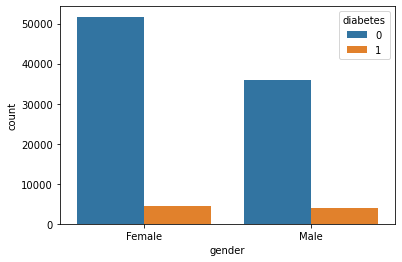

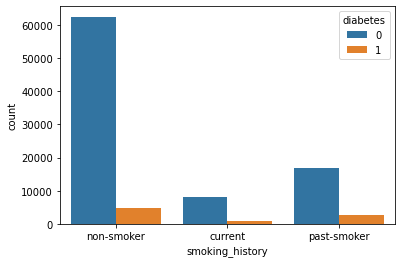

In [27]:
# Shows the Distribution  of diabetes with respect to other categorical variables

categorical = ["gender","smoking_history"]

for i in categorical:
    sns.countplot(x=data[i],data=data, hue = data['diabetes'])
    plt.show()

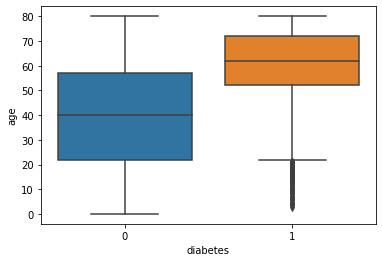

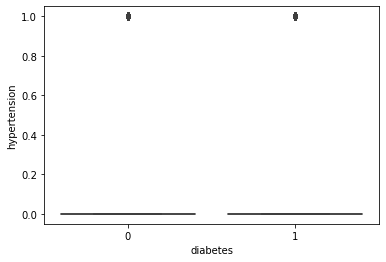

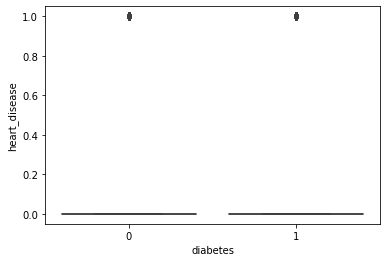

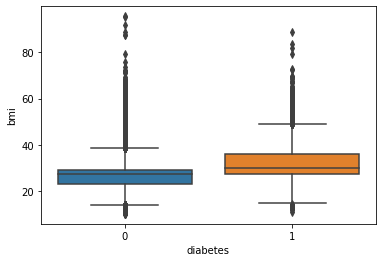

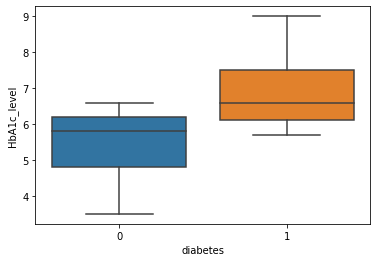

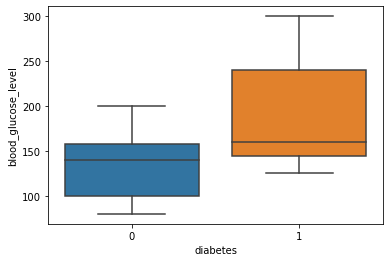

In [28]:
# Shows the Distribution of diabetes  with respect to other variables
continuous = ["age","hypertension","heart_disease","bmi","HbA1c_level","blood_glucose_level"]

for i in continuous:
    sns.boxplot(x = data['diabetes'], y = data[i])
    plt.show()
    

#From above graphs of categorical variables we can say that we have outliers for some variables and for accurate prediction we need to treate them

## OUTLIERS

#From the graphs we cay say that in Age we dont have any outliers.
#IN Hyper_tension & Heart_diease doesn't have any outliers.


# 1)  Finding the Outliers of BMI Values

In [29]:
data['bmi'].describe()

count    96128.000000
mean        27.321450
std          6.767811
min         10.010000
25%         23.400000
50%         27.320000
75%         29.860000
max         95.690000
Name: bmi, dtype: float64

In [30]:
percentile25 = data['bmi'].quantile(0.25)
percentile75 = data['bmi'].quantile(0.75)

In [31]:
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  29.86
25th quartile:  23.4


In [32]:
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

IQR:  6.460000000000001


In [33]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 39.55
Lower limit 13.709999999999997


In [34]:
df1= data[data['bmi'] < upper_limit]
df1.shape

(91183, 9)

In [35]:
df1 = data[(data.bmi>lower_limit)&(data.bmi<upper_limit)]
df1.shape

(90769, 9)

<AxesSubplot:xlabel='bmi'>

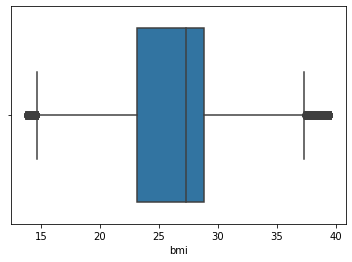

In [36]:
sns.boxplot(df1['bmi'])

In [37]:
df1['bmi'].describe()

count    90769.000000
mean        26.409602
std          5.232696
min         13.710000
25%         23.170000
50%         27.320000
75%         28.840000
max         39.540000
Name: bmi, dtype: float64

# 2)  Finding the Outliers of HbA1c_level Values

In [38]:
data['HbA1c_level'].describe()

count    96128.000000
mean         5.532633
std          1.073225
min          3.500000
25%          4.800000
50%          5.800000
75%          6.200000
max          9.000000
Name: HbA1c_level, dtype: float64

In [39]:
percentile25 = data['HbA1c_level'].quantile(0.25)
percentile75 = data['HbA1c_level'].quantile(0.75)

In [40]:
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  6.2
25th quartile:  4.8


In [41]:
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

IQR:  1.4000000000000004


In [42]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 8.3
Lower limit 2.6999999999999993


In [43]:
df1= data[data['HbA1c_level'] < upper_limit]
df1.shape

(94816, 9)

In [44]:
df1 = data[(data.HbA1c_level>lower_limit)&(data.HbA1c_level<upper_limit)]
df1.shape

(94816, 9)

<AxesSubplot:xlabel='HbA1c_level'>

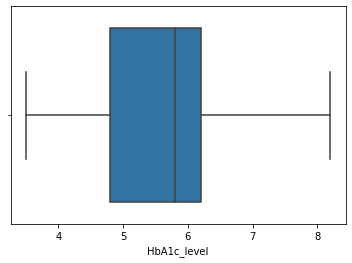

In [45]:
sns.boxplot(df1['HbA1c_level'])

In [46]:
df1['HbA1c_level'].describe()

count    94816.000000
mean         5.486046
std          1.004287
min          3.500000
25%          4.800000
50%          5.800000
75%          6.200000
max          8.200000
Name: HbA1c_level, dtype: float64

## BY this above outliers and visulization of box plot we came to say above for 6.5 range of HbA1c_level will have more chances to get diabetics

# 3)Finding Outliers of blood_glucose_level values

In [47]:
data['blood_glucose_level'].describe()

count    96128.000000
mean       138.218001
std         40.911190
min         80.000000
25%        100.000000
50%        140.000000
75%        159.000000
max        300.000000
Name: blood_glucose_level, dtype: float64

In [48]:
percentile25 = data['blood_glucose_level'].quantile(0.25)
percentile75 = data['blood_glucose_level'].quantile(0.75)

In [49]:
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  159.0
25th quartile:  100.0


In [50]:
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

IQR:  59.0


In [51]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 247.5
Lower limit 11.5


In [52]:
df1= data[data['blood_glucose_level'] < upper_limit]
df1.shape

(94097, 9)

In [53]:
df1 = data[(data.blood_glucose_level>lower_limit)&(data.blood_glucose_level<upper_limit)]
df1.shape

(94097, 9)

<AxesSubplot:xlabel='blood_glucose_level'>

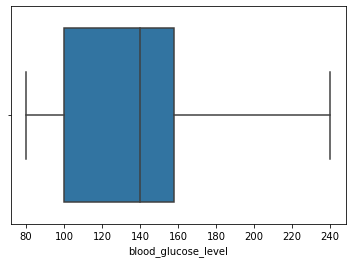

In [54]:
sns.boxplot(df1['blood_glucose_level'])

In [55]:
df1['blood_glucose_level'].describe()

count    94097.000000
mean       135.149473
std         35.477286
min         80.000000
25%        100.000000
50%        140.000000
75%        158.000000
max        240.000000
Name: blood_glucose_level, dtype: float64

## BY this above outliers and visulization of box plot we came to say above 180 mg/dL will have more chances to get diabetics

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94097 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               94097 non-null  object 
 1   age                  94097 non-null  float64
 2   hypertension         94097 non-null  int64  
 3   heart_disease        94097 non-null  int64  
 4   smoking_history      94097 non-null  object 
 5   bmi                  94097 non-null  float64
 6   HbA1c_level          94097 non-null  float64
 7   blood_glucose_level  94097 non-null  int64  
 8   diabetes             94097 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.2+ MB


In [57]:
df1.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,94097.000000,94097.000000,94097.000000,94097.000000,94097.000000,94097.000000,94097.000000
mean,41.385296,0.074041,0.038418,27.216247,5.502758,135.149473,0.068557
std,22.428104,0.261838,0.192204,6.710334,1.053340,35.477286,0.252701
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,23.000000,0.000000,0.000000,23.310000,4.800000,100.000000,0.000000
50%,42.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.670000,6.200000,158.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,240.000000,1.000000


## By above data and after completion of outliers removal we need to fetch/export the new data set and doing visualization

In [58]:
# Exporting file to csv file
#df1.to_csv("R1_Diabetes_Prediction.csv")


In [59]:
#df2= pd.read_csv("R1_Diabetes_Prediction.csv")
df2=df1
df2

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,non-smoker,25.19,6.6,140,0
1,Female,54.0,0,0,non-smoker,27.32,6.6,80,0
2,Male,28.0,0,0,non-smoker,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,non-smoker,24.60,4.8,145,0
99996,Female,2.0,0,0,non-smoker,17.37,6.5,100,0
99997,Male,66.0,0,0,past-smoker,27.83,5.7,155,0
99998,Female,24.0,0,0,non-smoker,35.42,4.0,100,0


In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94097 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               94097 non-null  object 
 1   age                  94097 non-null  float64
 2   hypertension         94097 non-null  int64  
 3   heart_disease        94097 non-null  int64  
 4   smoking_history      94097 non-null  object 
 5   bmi                  94097 non-null  float64
 6   HbA1c_level          94097 non-null  float64
 7   blood_glucose_level  94097 non-null  int64  
 8   diabetes             94097 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.2+ MB


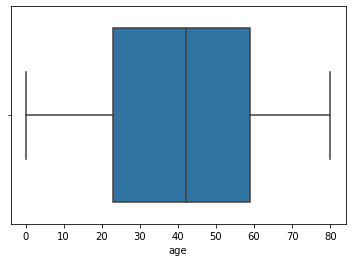

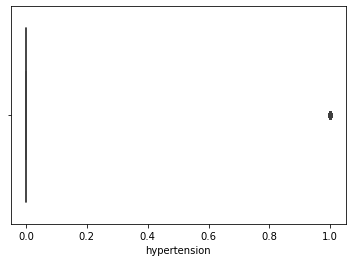

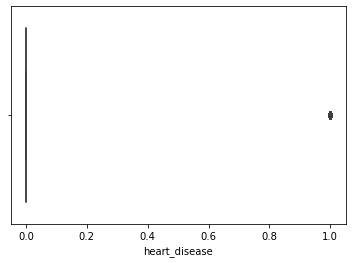

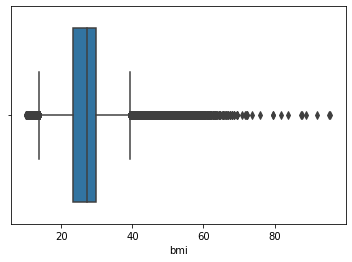

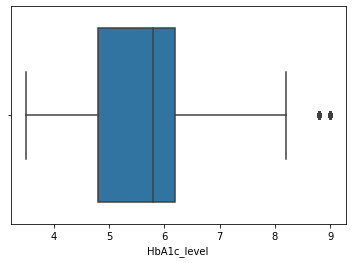

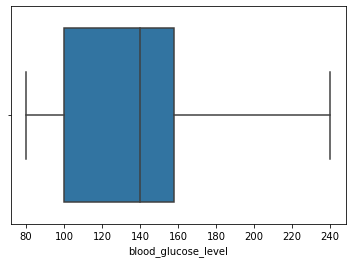

In [61]:
# Shows the Distribution of all continous variables charts with respect to other variables

continuos = ['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level']

for i in continuos:
    sns.boxplot(x=df2[i],data=df2, hue = df2['diabetes'])
    plt.show()
    

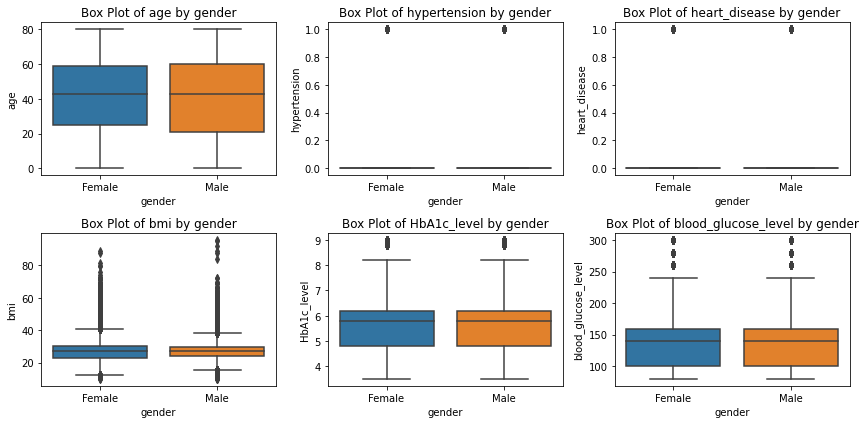

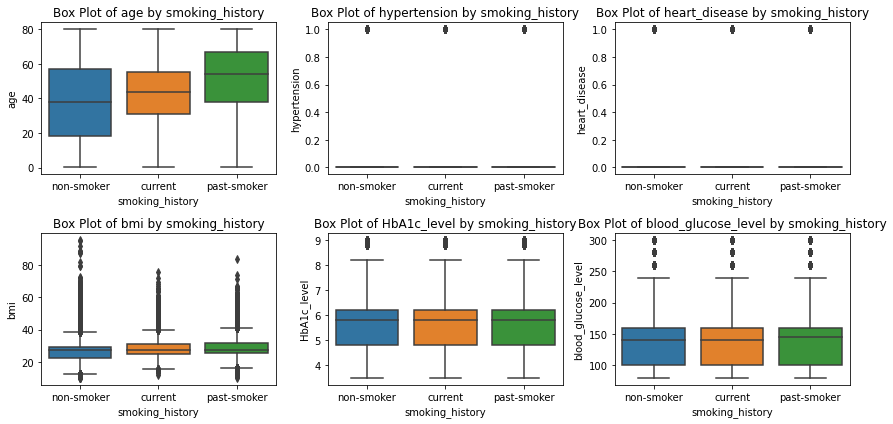

In [62]:
# Specify your categorical and continuous variables
categorical_var =  ["gender","smoking_history"]  
continuous_var = ['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level']

for cat_var in categorical_var:
    plt.figure(figsize=(12, 6))
    
    for cont_var in continuous_var:
        plt.subplot(2, 3, continuous_var.index(cont_var) + 1)
        sns.boxplot(x=cat_var, y=cont_var, data=data)
        plt.title(f'Box Plot of {cont_var} by {cat_var}')
        plt.xlabel(cat_var)
        plt.ylabel(cont_var)
    
    plt.tight_layout()
    plt.show()

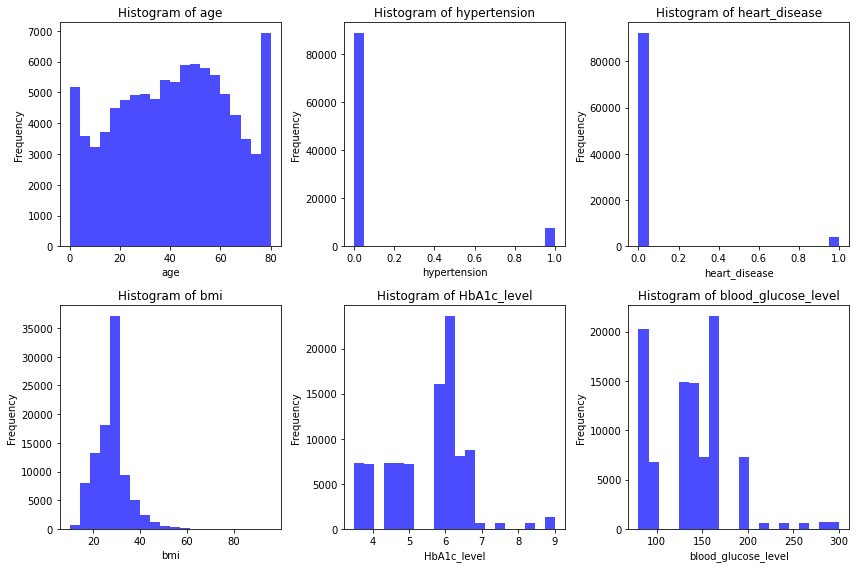

In [63]:
continuous_vars = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']


# Create subplots for continuous variables arranged in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, var in enumerate(continuous_vars):
    row = i // 3
    col = i % 3
    axes[row, col].hist(data[var], bins=20, color='blue', alpha=0.7)
    axes[row, col].set_title(f'Histogram of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Visualizing Age Distribution in our dataset

### From this below graph we can conclude that most of the patients that have `diabetes` are in the `age` between 52-75


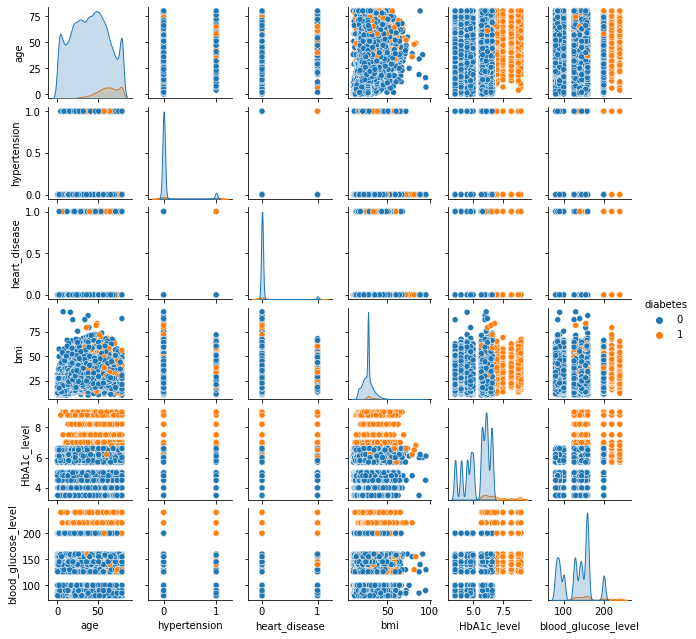

In [64]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Assuming you have a DataFrame called diabetes_data
sns.pairplot(df2,hue='diabetes',height= 1.5)
plt.show()


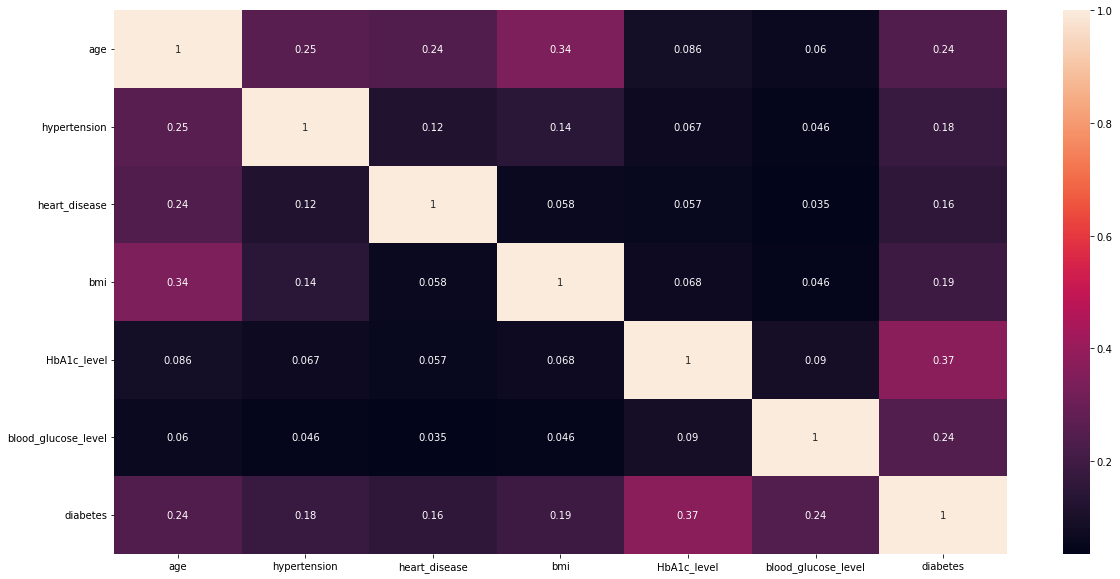

In [65]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df2.corr(),annot = True)
plt.show()

In [66]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df2[["gender","smoking_history"]], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df2, dummy], axis=1)

In [67]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_non-smoker,smoking_history_past-smoker
0,Female,80.0,0,1,non-smoker,25.19,6.6,140,0,0,1,0
1,Female,54.0,0,0,non-smoker,27.32,6.6,80,0,0,1,0
2,Male,28.0,0,0,non-smoker,27.32,5.7,158,0,1,1,0
3,Female,36.0,0,0,current,23.45,5.0,155,0,0,0,0
4,Male,76.0,1,1,current,20.14,4.8,155,0,1,0,0


In [68]:
# To display maximum rows and columns 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [69]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_non-smoker,smoking_history_past-smoker
0,Female,80.0,0,1,non-smoker,25.19,6.6,140,0,0,1,0
1,Female,54.0,0,0,non-smoker,27.32,6.6,80,0,0,1,0
2,Male,28.0,0,0,non-smoker,27.32,5.7,158,0,1,1,0
3,Female,36.0,0,0,current,23.45,5.0,155,0,0,0,0
4,Male,76.0,1,1,current,20.14,4.8,155,0,1,0,0


In [70]:
df=df.drop(["gender","smoking_history"],1)
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_non-smoker,smoking_history_past-smoker
0,80.0,0,1,25.19,6.6,140,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,1,1,0
3,36.0,0,0,23.45,5.0,155,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,0


#Test-Train Split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# Putting feature variable to X
X = df.drop(['diabetes'], axis=1)

X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_non-smoker,smoking_history_past-smoker
0,80.0,0,1,25.19,6.6,140,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0
2,28.0,0,0,27.32,5.7,158,1,1,0
3,36.0,0,0,23.45,5.0,155,0,0,0
4,76.0,1,1,20.14,4.8,155,1,0,0


In [73]:
# Putting response variable to y
y = df['diabetes']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [74]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [75]:
# To check the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((65867, 9), (28230, 9), (65867,), (28230,))

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
scaler = MinMaxScaler()

X_train[['age',"bmi","HbA1c_level","blood_glucose_level"]] = scaler.fit_transform(X_train[['age',"bmi","HbA1c_level","blood_glucose_level"]])

X_train.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_non-smoker,smoking_history_past-smoker
6651,0.086587,0,0,0.202031,0.545455,0.03125,0,1,0
81097,0.024024,0,0,0.109827,0.400000,0.40625,1,1,0
42858,1.000000,0,0,0.202031,0.400000,0.40625,0,1,0
18582,0.399399,0,0,0.202031,0.472727,0.31250,0,1,0
62885,0.061562,0,0,0.082633,0.563636,0.31250,1,1,0


In [78]:
X_test.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_non-smoker,smoking_history_past-smoker
79107,34.0,0,0,26.40,6.0,100,1,1,0
17703,49.0,0,0,31.53,4.0,80,0,0,0
83972,46.0,0,0,27.00,5.8,126,0,1,0
33597,59.0,0,0,35.58,6.6,200,0,0,0
30049,32.0,0,0,23.68,6.6,80,0,1,0


In [79]:
#scaler = MinMaxScaler()

X_test[['age',"bmi","HbA1c_level","blood_glucose_level"]] = scaler.fit_transform(X_test[['age',"bmi","HbA1c_level","blood_glucose_level"]])

X_test.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_non-smoker,smoking_history_past-smoker
79107,0.424424,0,0,0.192348,0.454545,0.1250,1,1,0
17703,0.612112,0,0,0.252553,0.090909,0.0000,0,0,0
83972,0.574575,0,0,0.199390,0.418182,0.2875,0,1,0
33597,0.737237,0,0,0.300082,0.563636,0.7500,0,0,0
30049,0.399399,0,0,0.160427,0.563636,0.0000,0,1,0


# Model Building

# Logistic Regression
#Logistic regression is a calculation used to predict a binary outcome: either something happens, or does not. This can be exhibited as Yes/No, Pass/Fail, Alive/Dead, etc. 

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr = LogisticRegression()

In [82]:
# Training data is used for model building
lr.fit(X_train, y_train)

LogisticRegression()

In [83]:
# Testing data is used for prediction
y_pred_logreg = lr.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(y_test, y_pred_logreg)

0.9580942260007085

In [86]:
# Libraries for Validation of models
from sklearn.metrics import confusion_matrix

In [87]:
logistic_confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
logistic_confusion_matrix

array([[26097,   174],
       [ 1009,   950]], dtype=int64)

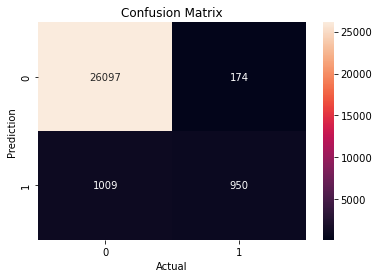

In [88]:
#Heatmap of Confusion Matrix
sns.heatmap(logistic_confusion_matrix, annot=True, fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()



In [89]:
from sklearn.metrics import roc_curve, roc_auc_score

In [90]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_logreg):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_logreg)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_logreg)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
    plot_roc_curve(fpr, tpr)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[26097   174]
 [ 1009   950]]
Accuracy: [0.95809423]
Sensitivity : [0.96277577]
Specificity : [0.84519573]
Precision: [0.99337673]
Recall: [0.96277577]
F-score: [0.9778369]
AUC: 0.7391590118847823
ROC curve:


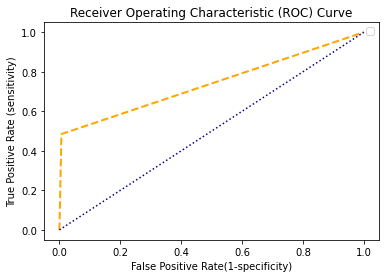

In [91]:
get_summary(y_test, y_pred_logreg)

# Support Vector Machine (SVM)

In [92]:
X_train.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_non-smoker,smoking_history_past-smoker
6651,0.086587,0,0,0.202031,0.545455,0.03125,0,1,0
81097,0.024024,0,0,0.109827,0.400000,0.40625,1,1,0
42858,1.000000,0,0,0.202031,0.400000,0.40625,0,1,0
18582,0.399399,0,0,0.202031,0.472727,0.31250,0,1,0
62885,0.061562,0,0,0.082633,0.563636,0.31250,1,1,0


In [93]:
y_train.head()

6651     0
81097    0
42858    0
18582    0
62885    0
Name: diabetes, dtype: int64

In [94]:
from sklearn.svm import SVC

In [95]:
svc = SVC()

In [96]:
svc.fit(X_train, y_train)

SVC()

In [97]:
y_pred_svc = svc.predict(X_test)

In [98]:
accuracy_score(y_test, y_pred_svc)

0.9589443854055969

In [99]:
SVM_confusion_matrix = confusion_matrix(y_test, y_pred_svc)
SVM_confusion_matrix

array([[26246,    25],
       [ 1134,   825]], dtype=int64)

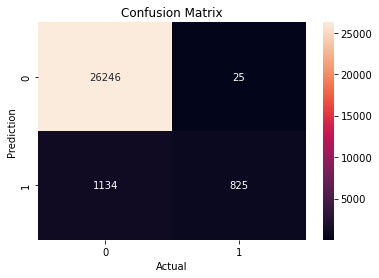

In [100]:
#Heatmap of Confusion Matrix


sns.heatmap(SVM_confusion_matrix, annot=True, fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

In [1]:
26246/(26246+25)

0.9990483803433444

In [ ]:
precision=(TP/(TP+FP))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[26246    25]
 [ 1134   825]]
Accuracy: [0.95894439]
Sensitivity : [0.95858291]
Specificity : [0.97058824]
Precision: [0.99904838]
Recall: [0.95858291]
F-score: [0.97839742]
AUC: 0.7100908057918867
ROC curve:


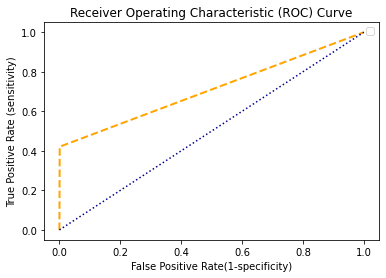

In [101]:
get_summary(y_test, y_pred_svc)

## Naive bayes Classification

In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
gnb = GaussianNB()

In [104]:
gnb.fit(X_train,y_train)

GaussianNB()

In [105]:
y_pred_gnb = gnb.predict(X_test)

In [106]:
accuracy_score(y_test,y_pred_gnb)

0.9005313496280553

In [107]:
gnb_confusion_matrix = confusion_matrix(y_test, y_pred_gnb)
gnb_confusion_matrix

array([[24369,  1902],
       [  906,  1053]], dtype=int64)

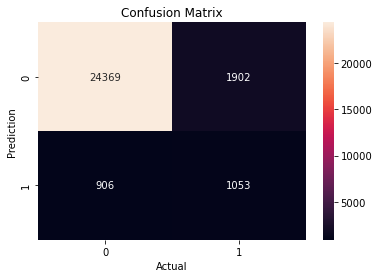

In [108]:
#Heatmap of Confusion Matrix


sns.heatmap(gnb_confusion_matrix, annot=True, fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[24369  1902]
 [  906  1053]]
Accuracy: [0.90053135]
Sensitivity : [0.9641543]
Specificity : [0.35634518]
Precision: [0.92760078]
Recall: [0.9641543]
F-score: [0.94552439]
AUC: 0.7325599594706209
ROC curve:


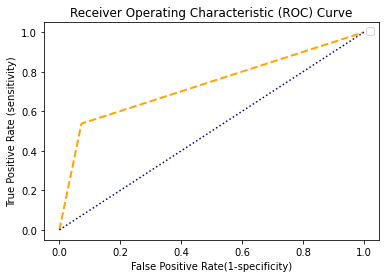

In [109]:
get_summary(y_test, y_pred_gnb)

# K - Nearest Neighbour

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
knn = KNeighborsClassifier()

In [112]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [113]:
y_pred_knn = knn.predict(X_test)

In [114]:
accuracy_score(y_test, y_pred_knn)

0.9603613177470776

In [115]:
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
knn_confusion_matrix

array([[26132,   139],
       [  980,   979]], dtype=int64)

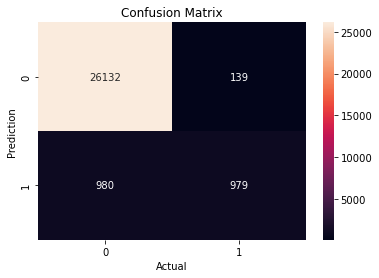

In [116]:
#Heatmap of Confusion Matrix


sns.heatmap(knn_confusion_matrix, annot=True, fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[26132   139]
 [  980   979]]
Accuracy: [0.96036132]
Sensitivity : [0.96385364]
Specificity : [0.87567084]
Precision: [0.99470899]
Recall: [0.96385364]
F-score: [0.97903827]
AUC: 0.7472268812238184
ROC curve:


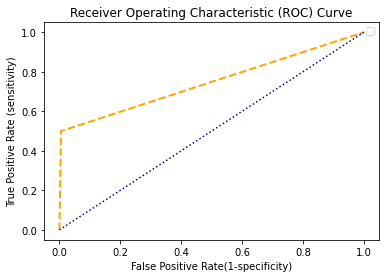

In [117]:
get_summary(y_test, y_pred_knn)

## Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
dtree = DecisionTreeClassifier()

In [120]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [121]:
y_pred_dtree = dtree.predict(X_test)

In [122]:
accuracy_score(y_test, y_pred_dtree)

0.9493800921006021

In [123]:
dtree_confusion_matrix = confusion_matrix(y_test, y_pred_dtree)
dtree_confusion_matrix

array([[25540,   731],
       [  698,  1261]], dtype=int64)

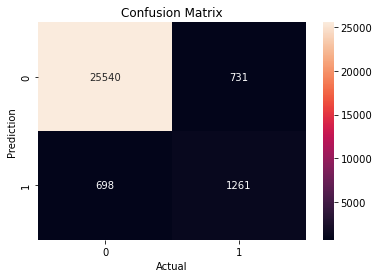

In [124]:
#Heatmap of Confusion Matrix


sns.heatmap(dtree_confusion_matrix, annot=True, fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

Confusion Matrix:
 [[25540   731]
 [  698  1261]]
Accuracy: [0.94938009]
Sensitivity : [0.97339736]
Specificity : [0.63303213]
Precision: [0.97217464]
Recall: [0.97339736]
F-score: [0.97278562]
AUC: 0.8079352021919255
ROC curve:


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


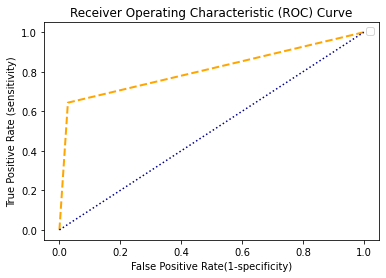

In [125]:
get_summary(y_test, y_pred_dtree)

# Random Forest


Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
rfc = RandomForestClassifier()

In [128]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [129]:
y_pred_rfc = rfc.predict(X_test)

In [130]:
accuracy_score(y_test, y_pred_rfc)

0.9670917463691109

In [131]:
RandomForest_confusion_matrix = confusion_matrix(y_test, y_pred_rfc)
RandomForest_confusion_matrix

array([[26172,    99],
       [  830,  1129]], dtype=int64)

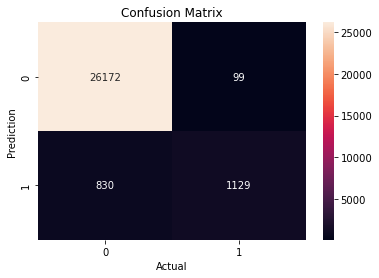

In [132]:
#Heatmap of Confusion Matrix


sns.heatmap(RandomForest_confusion_matrix, annot=True, fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[26172    99]
 [  830  1129]]
Accuracy: [0.96709175]
Sensitivity : [0.96926154]
Specificity : [0.91938111]
Precision: [0.99623159]
Recall: [0.96926154]
F-score: [0.98256152]
AUC: 0.7862730161528183
ROC curve:


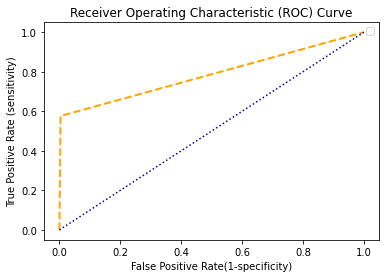

In [133]:
get_summary(y_test, y_pred_rfc)

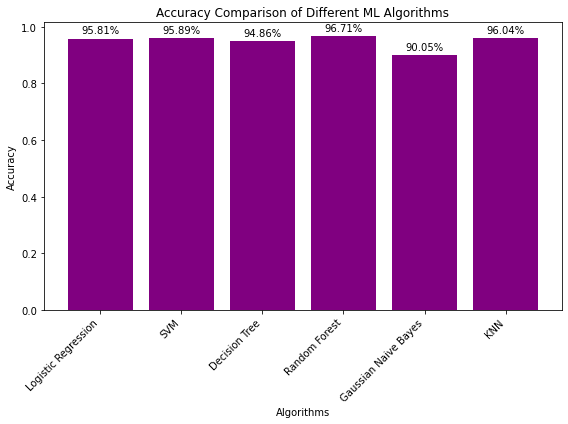

In [134]:
import matplotlib.pyplot as plt

# Sample accuracy_dict containing accuracy values for each algorithm
accuracy_dict = {
    'Logistic Regression':0.95809423,
    'SVM':0.95894439,
    'Decision Tree':0.9486362,
    'Random Forest':0.96709175,
    'Gaussian Naive Bayes':0.90053135,
    'KNN':0.96036132
   
}

# Create a bar plot for accuracy comparison
plt.figure(figsize=(8, 6))
bars= plt.bar(accuracy_dict.keys(), accuracy_dict.values(), color='purple')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different ML Algorithms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate each bar with its corresponding accuracy value as percentage
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    #plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2%}', ha='center', va='bottom')

# Display the plot
plt.show()
